# Californias-Largest-Public-Pay-and-Pension-Database

## Business Understanding

##### This dataset describes the emloyees salries in San Francisco City, Californias.

##### We'll analyse this dataset to answer for three main questions:
##### 1- How many unique job titles? and Common Jobs?
##### 2- What is the average base pay?
##### 3- The correlation between job titles and total pay benefits?

## Data Understandinh

This dataset can be found on Kaggle:
https://www.kaggle.com/kaggle/sf-salaries

In [1]:
# Retrive the libraries need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

# Read and explore data that save in "sal" variable

sal = df = pd.read_csv('./Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
# Show the describe of the data (columns, count, ...)
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


## Prepare Data

In [3]:
# Find how many null values in each collumns
sal.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [4]:
# Delete Two columns that all null Values

sal1 = sal.drop(['Notes', 'Status'], axis='columns')

In [5]:
# Show the first five rows in the data set after deleting
sal1.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


In [6]:
# Find how many null values in each collumns
sal1.isna().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [7]:
# Find the average of the base pay
sal1['BasePay'].mean()

66325.44884050643

In [8]:
# Fill the null values in base pay columns by the mean of the base pay values
sal1['BasePay'].fillna(value=sal1['BasePay'].mean(), inplace=True)

In [9]:
# Fill the null values in OvertimePay columns by the mean of the OvertimePay values
sal1['OvertimePay'].fillna(value=sal1['OvertimePay'].mean(), inplace=True)

In [10]:
# Fill the null values in OtherPay columns by the mean of the OtherPay values

sal1['OtherPay'].fillna(value=sal1['OtherPay'].mean(), inplace=True)

In [11]:
# Find how many null values in each collumns

sal1.isna().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay                 0
OvertimePay             0
OtherPay                0
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [12]:
# Find the average of the Benefits
sal1['Benefits'].mean()

25007.893150830107

In [13]:
# Find the maximum value of the Benefits
sal1['Benefits'].max()

96570.66

In [14]:
# Find the minimum value of the Benefits
sal1['Benefits'].min()

-33.89

In [15]:
# Fill the null values in Benefits columns by the mean of the Benefits values

sal1['Benefits'].fillna(value=sal1['Benefits'].mean(), inplace=True)

In [16]:
# Find how many null values in each collumns

sal1.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [17]:
# Show the first 15 rows in the new dataset after wrangling the data
sal1.head(15)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,25007.893151,316285.74,316285.74,2011,San Francisco
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,25007.893151,315981.05,315981.05,2011,San Francisco
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,25007.893151,307899.46,307899.46,2011,San Francisco
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,25007.893151,303427.55,303427.55,2011,San Francisco
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,25007.893151,302377.73,302377.73,2011,San Francisco


## Modeling & Evaluating Data

#### Gives the Average of the BasePay and Overtime Pay?

In [18]:
# Find the average of the OvertimePay

sal1['OvertimePay'].mean()

5066.059886444623

In [19]:
# Find the average of the BasePay

sal1['BasePay'].mean()

66325.44884050524

In [20]:
# Find the average of the TotalPayBenefits

sal1['TotalPayBenefits'].mean()

93692.55481056834

#### What is the name of highest paid person (including benefits)?

In [21]:
# find the maximum values in TotalPayBenefits column
sal1[sal1['TotalPayBenefits']== sal1['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco


#### What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?

In [22]:
# find the minimum values in TotalPayBenefits column
sal1[sal1['TotalPayBenefits']== sal1['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,San Francisco


In [23]:
# Because the minimum values in the TotalPayBenefite columns is negative, So will find the minimum value in just positive integer
sal1[sal1['TotalPayBenefits']>0].min()

Id                                 1
EmployeeName        A BERNARD FATOOH
JobTitle               ACCOUNT CLERK
BasePay                      -166.01
OvertimePay                    -0.01
OtherPay                    -7058.59
Benefits                       -13.8
TotalPay                         0.0
TotalPayBenefits                 0.3
Year                            2011
Agency                 San Francisco
dtype: object

#### What was the average (mean) BasePay of all employees per year? (2011-2014) ?

In [24]:
# find the average BasePay in certain period
sal1.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69576.866579
2014    66564.396851
Name: BasePay, dtype: float64

#### How many unique job titles are there?

In [25]:
# How many job title in the dataset are mentioned once and frequent exclusion
sal1['JobTitle'].nunique()

2159

#### What are the top 5 most common jobs? 

In [26]:
# find how many each job titles mentions in the dataset
sal1['JobTitle'].value_counts().head()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

#### How many Job Titles were represented by only one person?

In [27]:
# How many job titles that represent by one persons in the dataset
sum(sal1['JobTitle'].value_counts() == 1)

239

#### How many people have the word Chief in their job title?

In [28]:
# find how many job title have word "Chief"
# take all job title in the dataset have word "Chief" and return the sum of these jobs
def chief_string(title):
    if 'chief' in title.lower():
        return True
    else:
        return False
    

sum(sal1['JobTitle'].apply(lambda x: chief_string(x)))

627

#### Is there a correlation between length of the Job Title string and Salary?

In [29]:
# Find if there is a relation between the lenght of the job title with salary 
sal1['title_len'] = sal1['JobTitle'].apply(len)

sal1[['title_len','TotalPayBenefits']].corr()

,title_len,TotalPayBenefits
title_len,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


In [30]:
# Find if there is a relation between the job title with salary 
sal1['JobTitle'] = sal1['JobTitle'].apply(len)

sal1[['JobTitle','TotalPayBenefits']].corr()

,JobTitle,TotalPayBenefits
JobTitle,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


### Visualize Data

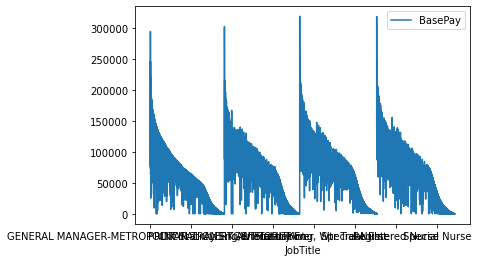

In [31]:
# Plot graph between job title and base pay
df.plot(x="JobTitle", y=["BasePay",])
plt.show()

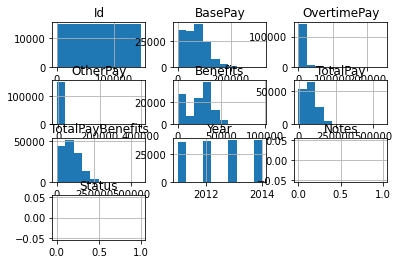

In [32]:
# Hist graph on all dataset
df.hist()
plt.show()

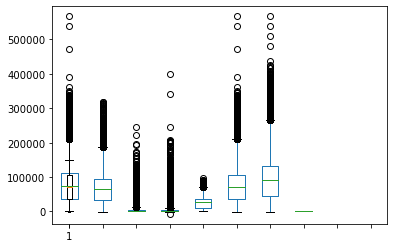

In [33]:
# plot box graph for the total pay
df.plot.box()  
plt.boxplot(df['TotalPay'])
plt.show()

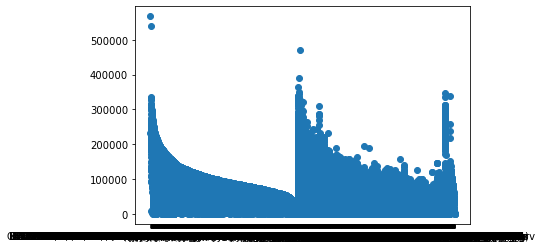

In [34]:
# Scatter graph betwee job title and total pay
plt.scatter(df['JobTitle'], df['TotalPay'])
plt.show()